In [1]:
from itertools import permutations
import random
import math
import matplotlib.pyplot as plt
import time

In [2]:
A = [('a1',9), ('a2',6), ('a3',3), ('a4',8), ('a5',5)]

B = [('b1',5), ('b2',7), ('b3',2), ('b4',10)]

In [3]:
jobs = A + B

In [4]:
def genera_soluzione_iniziale(jobs):

    soluzione_iniziale = random.sample(jobs, len(jobs))

    # permutazioni = list(permutations(jobs))
    
    # i = random.randint(0, len(permutazioni)-1)
    # soluzione_inziale = list(permutazioni[i])

    return soluzione_iniziale

In [5]:
def vicinato_iniziale(sequenza):
    tutte_combinazioni_due_elementi = list(permutations(sequenza, 2))
    permutazioni_con_scambio = []

    for combinazione in tutte_combinazioni_due_elementi:
        indice1 = sequenza.index(combinazione[0])
        indice2 = sequenza.index(combinazione[1])

        # Scambia al massimo due elementi
        sequenza_copy = sequenza.copy()
        sequenza_copy[indice1], sequenza_copy[indice2] = sequenza_copy[indice2], sequenza_copy[indice1]

        permutazioni_con_scambio.append(sequenza_copy)

    return permutazioni_con_scambio

In [5]:
def vicinato(sequenza, num_scambi=2):
    # tutte_combinazioni = list(permutations(sequenza, num_scambi))
    random_pairs_indices = []
    for _ in range(100):    
        random_pairs_indices.append(random.sample((range(len(jobs))), 2))
    random_combinations = [(sequenza[i], sequenza[j]) for i, j in random_pairs_indices]

    permutazioni_con_scambio = []
    for combinazione in random_combinations:
        indici = [sequenza.index(elem) for elem in combinazione]

        # Scambia num_scambi elementi
        sequenza_copy = sequenza.copy()
        for i in range(num_scambi - 1):
            sequenza_copy[indici[i]], sequenza_copy[indici[i+1]] = sequenza_copy[indici[i+1]], sequenza_copy[indici[i]]

        permutazioni_con_scambio.append(sequenza_copy)

    return permutazioni_con_scambio

In [6]:
def energia(soluzione, alfa):
    somma_A = 0
    somma_B = 0
    somma_tot = 0
    for job in soluzione:
        string = str(job[0])
        somma_tot += job[1]
        if string.startswith('a'):
            somma_A += somma_tot
        else:
            somma_B += somma_tot
    
    return (alfa * (somma_A + somma_B)) + ((1-alfa) * abs((somma_A - somma_B)))
        


In [7]:
def genera_temperatura_iniziale(soluzione, alfa):
    vicini = vicinato(soluzione)
    differenze_energie = list()
    for vicino in vicini:
        diff = abs(energia(soluzione, alfa) - energia(vicino, alfa))
        differenze_energie.append(diff)
    
    return max(differenze_energie)

#     j = random.randint(0, len(vicini)-1)
#     y = vicini[j]

#     if(abs(energia(soluzione, alfa) - energia(y, alfa)) != 0):
#         return abs(energia(soluzione, alfa) - energia(y, alfa))    
# #se la differenza è uguale a zero cerco un altro vicino
#     return abs(energia(soluzione, alfa) - energia(y, alfa))

In [8]:
def simulated_annealing(jobs, iteration, alfa, beta):
    start_time = time.time()
    x = genera_soluzione_iniziale(jobs)
    ottimo = x
    temperatura = genera_temperatura_iniziale(x, alfa)
    L = len(vicinato(x))

    iterazioni, valori_ottimi = list(), list() 

    for i in range(iteration):
        for _ in range(L):
            vicini = vicinato(x)
            j = random.randint(0, len(vicini)-1)
            y = vicini[j]

            delta = energia(y, alfa) - energia(x, alfa)

            if delta < 0:
                x = y
            elif math.exp(-delta / temperatura) > random.random():
                x = y
                
            if(energia(x, alfa) < energia(ottimo, alfa)):
                ottimo = x
                print(i)

        iterazioni.append(i)
        valori_ottimi.append(energia(ottimo,alfa))
        
        temperatura = beta * temperatura
    end_time = time.time()
    plt.plot(iterazioni, valori_ottimi)
    plt.xlabel('Iterazione')
    plt.ylabel('Energia')
    plt.title('Convergenza Simulated Annealing')
    # Trova l'indice del primo valore di y uguale a 110
    indice = next((i for i, v in enumerate(valori_ottimi) if v == 110), None)

    # Disegna la linea verticale in corrispondenza dell'indice trovato
    if indice is not None:
        plt.axvline(x=iterazioni[indice], color='maroon', label='Valore 110')
        plt.legend()  # Aggiunge la legenda al grafico

    plt.show()    
    elapsed_time = end_time - start_time
    print("Tempo di esecuzione:", elapsed_time, "secondi")
    return ottimo, energia(ottimo, alfa)
        


0
0
0
0
1
1
2
5
8
27
35
52


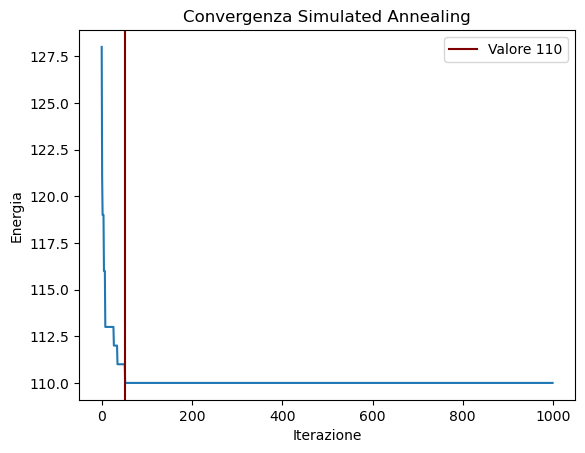

Tempo di esecuzione: 44.364054918289185 secondi


In [9]:
soluzione_ottima = simulated_annealing(jobs, 1000, 0.5, 0.95)

In [10]:
soluzione_ottima[1]

110.0

0.0
22.400000000000002
44.800000000000004
66.4
88.2
110.0
131.6
153.2
174.8
196.4
217.0


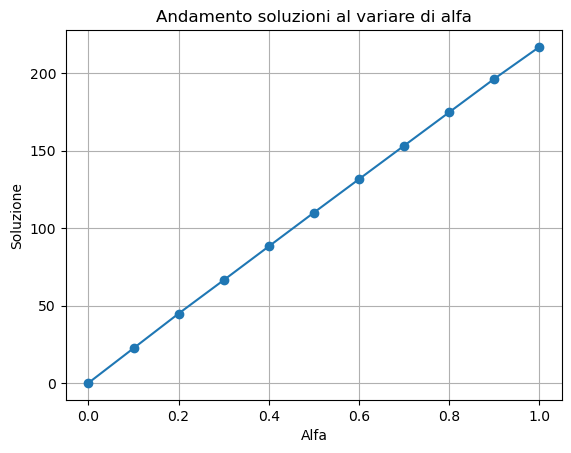

In [45]:
# Lista per memorizzare i valori di alfa
alfas = []
# Lista per memorizzare i valori di y
soluzioni = []
n_iter = 1000

# Chiamata del metodo con alfa che varia da 0 a 1 con incremento di 0.1
for alfa in [i / 10.0 for i in range(11)]:
    alfas.append(alfa)
    best, best_eval = simulated_annealing(jobs, 1000, alfa, 0.95)
    print(best_eval)
    soluzioni.append(best_eval)

# Plot dei risultati
plt.plot(alfas, soluzioni, marker='o')
plt.xlabel('Alfa')
plt.ylabel('Soluzione')
plt.title('Andamento soluzioni al variare di alfa')
plt.grid(True)
plt.show()

In [24]:
def simulated_annealing_beta(jobs, iteration, alfa, beta):
    x = jobs
    ottimo = x
    temperatura = genera_temperatura_iniziale(x, alfa)
    L = len(vicinato(x))

    for i in range(iteration):
        for _ in range(L):
            vicini = vicinato(x)
            j = random.randint(0, len(vicini)-1)
            y = vicini[j]

            delta = energia(y, alfa) - energia(x, alfa)

            if delta < 0:
                x = y
            elif math.exp(-delta / temperatura) > random.random():
                x = y
                
            if(energia(x, alfa) < energia(ottimo, alfa)):
                ottimo = x

            if(energia(ottimo,alfa) == 110.0):
                return i
    
    return i

999
999
999
941
999
129
999
129
700
999
323
4
28
203
999
999
999
999
476
50
999
871
999
261
253
999
999
999
999
999
999
999
999
999
907
395
288
999
901
210
999
452
999
999
532
999
999
999
999
999


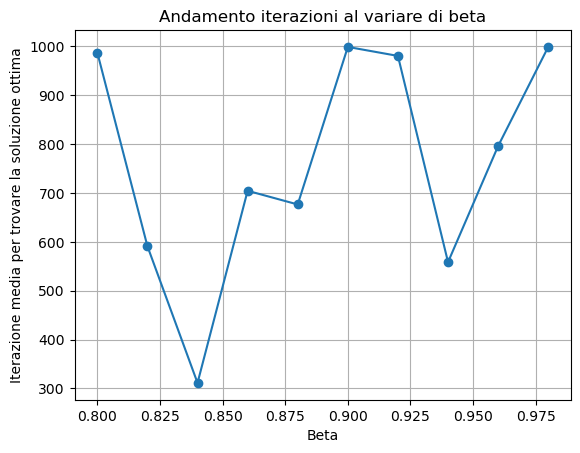

In [28]:
# Lista per memorizzare i valori di alfa
betas = []
# Lista per memorizzare i valori di y
n_iter = 1000

beta_2_iteration = {}

# Chiamata del metodo con alfa che varia da 0 a 1 con incremento di 0.1
for beta in [i / 100.0 for i in range(80, 100, 2)]:
    iterazioni = []
    for _ in range(5):
        iterazione = simulated_annealing_beta(jobs, 1000, 0.5, beta)
        iterazioni.append(iterazione) 
        print(iterazione)
    betas.append(beta)
    beta_2_iteration[beta] = iterazioni
# Plot dei risultati

media_iterazioni = []
for beta in betas:
    val = beta_2_iteration.get(beta)
    media = sum(val)/len(val)
    media_iterazioni.append(media)
    

plt.plot(betas, media_iterazioni, marker='o')
plt.xlabel('Beta')
plt.ylabel('Iterazione media per trovare la soluzione ottima')
plt.title('Andamento iterazioni al variare di beta')
plt.grid(True)
plt.show()

##  INPUT DINAMICO
### TEMPO DI ESECUZIONE MEDIO E SOLUZIONE RITORNATA MEDIA: 10 esecuzioni con 10 job totali con 5000 iterazioni

In [33]:
jobs = [('a1', 14), ('a2', 18), ('a3', 23), ('a4', 26), ('a5', 28), ('b1', 23), ('b2', 15), ('b3', 16), ('b4', 37), ('b5', 19)]

In [29]:
tempi_esecuzione, soluzioni = list(), list()
for _ in range(10):
    start_time = time.time()
    best_eval = simulated_annealing(jobs, 1000, 0.5, 0.95)[1]
    end_time = time.time()
    tempo = end_time - start_time
    print(tempo)
    tempi_esecuzione.append(tempo)
    soluzioni.append(best_eval)
print("Tempi: ", tempi_esecuzione)
print("Soluzioni: ", soluzioni)

30.095021724700928
30.380550384521484
30.41146445274353
30.54268980026245
30.195152759552002
30.576411724090576
30.85555076599121
30.78346562385559
31.008551359176636
30.943771362304688
Tempi:  [30.095021724700928, 30.380550384521484, 30.41146445274353, 30.54268980026245, 30.195152759552002, 30.576411724090576, 30.85555076599121, 30.78346562385559, 31.008551359176636, 30.943771362304688]
Soluzioni:  [514.0, 514.0, 515.0, 515.0, 514.0, 514.0, 514.0, 514.0, 514.0, 515.0]


In [3]:
tempi = []
tempi_esecuzione = [30.095021724700928, 30.380550384521484, 30.41146445274353, 30.54268980026245, 30.195152759552002, 30.576411724090576, 30.85555076599121, 30.78346562385559, 31.008551359176636, 30.943771362304688]
tempo_medio = sum(tempi_esecuzione)/len(tempi_esecuzione)
print("Tempo medio: " + str(sum(tempi_esecuzione)/len(tempi_esecuzione)))
tempi.append(tempo_medio)

Tempo medio: 30.57926299571991


In [6]:
soluzioni = [514.0, 514.0, 515.0, 515.0, 514.0, 514.0, 514.0, 514.0, 514.0, 515.0]
soluzioni_finali = []
soluzione_media = sum(soluzioni)/len(soluzioni)
print("Soluzione media: " + str(sum(soluzioni)/len(soluzioni)))
soluzioni_finali.append(soluzione_media)

Soluzione media: 514.3


### TEMPO DI ESECUZIONE MEDIO E SOLUZIONE RITORNATA MEDIA: 10 esecuzioni con 100 job totali con 1000 iterazioni

In [30]:
jobs = [('a1', 22), ('a2', 49), ('a3', 19), ('a4', 13), ('a5', 35), ('a6', 26), ('a7', 14), ('a8', 41), ('a9', 28), ('a10', 38), ('a11', 18), ('a12', 21), ('a13', 35), ('a14', 18), ('a15', 15), ('a16', 30), ('a17', 33), ('a18', 12), ('a19', 34), ('a20', 25), ('a21', 26), ('a22', 27), ('a23', 24), ('a24', 10), ('a25', 41), ('a26', 46), ('a27', 21), ('a28', 46), ('a29', 45), ('a30', 16), ('a31', 45), ('a32', 28), ('a33', 32), ('a34', 20), ('a35', 49), ('a36', 11), ('a37', 18), ('a38', 49), ('a39', 28), ('a40', 37), ('a41', 40), ('a42', 37), ('a43', 30), ('a44', 42), ('a45', 22), ('a46', 27), ('a47', 46), ('a48', 19), ('a49', 43), ('a50', 50), ('b1', 29), ('b2', 21), ('b3', 16), ('b4', 17), ('b5', 35), ('b6', 13), ('b7', 32), ('b8', 39), ('b9', 14), ('b10', 18), ('b11', 16), ('b12', 37), ('b13', 49), ('b14', 50), ('b15', 44), ('b16', 30), ('b17', 44), ('b18', 48), ('b19', 30), ('b20', 19), ('b21', 38), ('b22', 19), ('b23', 27), ('b24', 10), ('b25', 30), ('b26', 46), ('b27', 15), ('b28', 24), ('b29', 33), ('b30', 48), ('b31', 17), ('b32', 28), ('b33', 46), ('b34', 26), ('b35', 33), ('b36', 26), ('b37', 29), ('b38', 27), ('b39', 23), ('b40', 35), ('b41', 30), ('b42', 25), ('b43', 31), ('b44', 19), ('b45', 23), ('b46', 44), ('b47', 42), ('b48', 46), ('b49', 15), ('b50', 50)]

In [31]:
tempi_esecuzione, soluzioni = list(), list()
for _ in range(10):
    start_time = time.time()
    best_eval = simulated_annealing(jobs, 1000, 0.5, 0.95)[1]
    end_time = time.time()
    tempo = end_time - start_time
    print(tempo)
    tempi_esecuzione.append(tempo)
    soluzioni.append(best_eval)
print("Tempi: ", tempi_esecuzione)
print("Soluzioni: ", soluzioni)

60.5111300945282
61.27762961387634
60.529088497161865
61.246705293655396
60.793888568878174
61.22289514541626
60.9445960521698
60.70883369445801
60.487271308898926
60.64378476142883
Tempi:  [60.5111300945282, 61.27762961387634, 60.529088497161865, 61.246705293655396, 60.793888568878174, 61.22289514541626, 60.9445960521698, 60.70883369445801, 60.487271308898926, 60.64378476142883]
Soluzioni:  [59393.0, 59382.0, 59392.0, 59362.0, 59453.0, 59480.0, 59368.0, 59455.0, 59397.0, 59366.0]


In [5]:
tempi_esecuzione = [60.5111300945282, 61.27762961387634, 60.529088497161865, 61.246705293655396, 60.793888568878174, 61.22289514541626, 60.9445960521698, 60.70883369445801, 60.487271308898926, 60.64378476142883]
tempo_medio = sum(tempi_esecuzione)/len(tempi_esecuzione)
print("Tempo medio: " + str(sum(tempi_esecuzione)/len(tempi_esecuzione)))
tempi.append(tempo_medio)

Tempo medio: 60.83658230304718


In [7]:
soluzioni = [59393.0, 59382.0, 59392.0, 59362.0, 59453.0, 59480.0, 59368.0, 59455.0, 59397.0, 59366.0]
soluzione_media = sum(soluzioni)/len(soluzioni)
print("Soluzione media: " + str(sum(soluzioni)/len(soluzioni)))
soluzioni_finali.append(soluzione_media)

Soluzione media: 59404.8


### TEMPO DI ESECUZIONE MEDIO E SOLUZIONE RITORNATA MEDIA: 10 esecuzioni con 500 job totali con 1000 iterazioni

In [35]:
jobs = [('a1', 50), ('a2', 22), ('a3', 30), ('a4', 28), ('a5', 21), ('a6', 12), ('a7', 16), ('a8', 11), ('a9', 21), ('a10', 17), ('a11', 16), ('a12', 50), ('a13', 28), ('a14', 11), ('a15', 28), ('a16', 26), ('a17', 30), ('a18', 44), ('a19', 20), ('a20', 45), ('a21', 14), ('a22', 50), ('a23', 40), ('a24', 30), ('a25', 18), ('a26', 26), ('a27', 48), ('a28', 22), ('a29', 44), ('a30', 41), ('a31', 26), ('a32', 46), ('a33', 23), ('a34', 42), ('a35', 14), ('a36', 27), ('a37', 21), ('a38', 36), ('a39', 33), ('a40', 26), ('a41', 21), ('a42', 39), ('a43', 16), ('a44', 18), ('a45', 15), ('a46', 49), ('a47', 20), ('a48', 22), ('a49', 11), ('a50', 26), ('a51', 14), ('a52', 12), ('a53', 40), ('a54', 35), ('a55', 50), ('a56', 49), ('a57', 36), ('a58', 32), ('a59', 47), ('a60', 23), ('a61', 12), ('a62', 25), ('a63', 44), ('a64', 17), ('a65', 34), ('a66', 18), ('a67', 10), ('a68', 42), ('a69', 41), ('a70', 38), ('a71', 40), ('a72', 47), ('a73', 41), ('a74', 37), ('a75', 21), ('a76', 21), ('a77', 30), ('a78', 44), ('a79', 46), ('a80', 47), ('a81', 24), ('a82', 28), ('a83', 41), ('a84', 43), ('a85', 20), ('a86', 10), ('a87', 11), ('a88', 41), ('a89', 27), ('a90', 45), ('a91', 25), ('a92', 24), ('a93', 39), ('a94', 38), ('a95', 46), ('a96', 35), ('a97', 45), ('a98', 45), ('a99', 44), ('a100', 36), ('a101', 19), ('a102', 32), ('a103', 17), ('a104', 39), ('a105', 28), ('a106', 14), ('a107', 17), ('a108', 21), ('a109', 29), ('a110', 22), ('a111', 21), ('a112', 46), ('a113', 16), ('a114', 46), ('a115', 12), ('a116', 13), ('a117', 17), ('a118', 47), ('a119', 32), ('a120', 13), ('a121', 39), ('a122', 25), ('a123', 31), ('a124', 22), ('a125', 45), ('a126', 36), ('a127', 29), ('a128', 21), ('a129', 47), ('a130', 36), ('a131', 24), ('a132', 50), ('a133', 17), ('a134', 20), ('a135', 35), ('a136', 24), ('a137', 23), ('a138', 32), ('a139', 41), ('a140', 34), ('a141', 38), ('a142', 41), ('a143', 21), ('a144', 32), ('a145', 19), ('a146', 21), ('a147', 49), ('a148', 10), ('a149', 26), ('a150', 44), ('a151', 13), ('a152', 47), ('a153', 32), ('a154', 10), ('a155', 12), ('a156', 13), ('a157', 25), ('a158', 25), ('a159', 28), ('a160', 20), ('a161', 46), ('a162', 49), ('a163', 13), ('a164', 31), ('a165', 44), ('a166', 23), ('a167', 40), ('a168', 16), ('a169', 45), ('a170', 27), ('a171', 38), ('a172', 22), ('a173', 13), ('a174', 18), ('a175', 26), ('a176', 10), ('a177', 26), ('a178', 19), ('a179', 12), ('a180', 14), ('a181', 39), ('a182', 35), ('a183', 25), ('a184', 32), ('a185', 24), ('a186', 42), ('a187', 40), ('a188', 32), ('a189', 49), ('a190', 32), ('a191', 10), ('a192', 15), ('a193', 19), ('a194', 16), ('a195', 19), ('a196', 32), ('a197', 34), ('a198', 38), ('a199', 33), ('a200', 33), ('a201', 40), ('a202', 42), ('a203', 20), ('a204', 20), ('a205', 31), ('a206', 34), ('a207', 32), ('a208', 36), ('a209', 17), ('a210', 13), ('a211', 13), ('a212', 38), ('a213', 34), ('a214', 43), ('a215', 19), ('a216', 23), ('a217', 25), ('a218', 13), ('a219', 29), ('a220', 40), ('a221', 37), ('a222', 22), ('a223', 49), ('a224', 27), ('a225', 35), ('a226', 49), ('a227', 13), ('a228', 12), ('a229', 22), ('a230', 16), ('a231', 30), ('a232', 15), ('a233', 27), ('a234', 49), ('a235', 34), ('a236', 29), ('a237', 18), ('a238', 17), ('a239', 16), ('a240', 16), ('a241', 23), ('a242', 50), ('a243', 18), ('a244', 27), ('a245', 43), ('a246', 32), ('a247', 32), ('a248', 11), ('a249', 48), ('a250', 40), ('b1', 23), ('b2', 22), ('b3', 23), ('b4', 18), ('b5', 12), ('b6', 31), ('b7', 27), ('b8', 21), ('b9', 37), ('b10', 18), ('b11', 47), ('b12', 20), ('b13', 27), ('b14', 44), ('b15', 16), ('b16', 47), ('b17', 21), ('b18', 31), ('b19', 36), ('b20', 10), ('b21', 49), ('b22', 35), ('b23', 46), ('b24', 35), ('b25', 46), ('b26', 29), ('b27', 47), ('b28', 12), ('b29', 47), ('b30', 36), ('b31', 42), ('b32', 17), ('b33', 32), ('b34', 22), ('b35', 27), ('b36', 40), ('b37', 24), ('b38', 38), ('b39', 46), ('b40', 24), ('b41', 10), ('b42', 27), ('b43', 44), ('b44', 36), ('b45', 47), ('b46', 30), ('b47', 40), ('b48', 13), ('b49', 10), ('b50', 29), ('b51', 26), ('b52', 29), ('b53', 45), ('b54', 25), ('b55', 37), ('b56', 14), ('b57', 26), ('b58', 29), ('b59', 31), ('b60', 16), ('b61', 34), ('b62', 25), ('b63', 23), ('b64', 39), ('b65', 30), ('b66', 26), ('b67', 18), ('b68', 26), ('b69', 16), ('b70', 18), ('b71', 33), ('b72', 45), ('b73', 35), ('b74', 48), ('b75', 20), ('b76', 31), ('b77', 28), ('b78', 22), ('b79', 47), ('b80', 20), ('b81', 38), ('b82', 39), ('b83', 41), ('b84', 23), ('b85', 35), ('b86', 20), ('b87', 21), ('b88', 46), ('b89', 18), ('b90', 27), ('b91', 30), ('b92', 35), ('b93', 46), ('b94', 40), ('b95', 41), ('b96', 23), ('b97', 44), ('b98', 42), ('b99', 42), ('b100', 26), ('b101', 40), ('b102', 42), ('b103', 31), ('b104', 46), ('b105', 28), ('b106', 22), ('b107', 16), ('b108', 33), ('b109', 42), ('b110', 34), ('b111', 27), ('b112', 19), ('b113', 20), ('b114', 19), ('b115', 33), ('b116', 35), ('b117', 45), ('b118', 34), ('b119', 47), ('b120', 45), ('b121', 12), ('b122', 27), ('b123', 45), ('b124', 24), ('b125', 11), ('b126', 22), ('b127', 42), ('b128', 27), ('b129', 49), ('b130', 38), ('b131', 47), ('b132', 32), ('b133', 40), ('b134', 34), ('b135', 22), ('b136', 49), ('b137', 33), ('b138', 22), ('b139', 34), ('b140', 47), ('b141', 47), ('b142', 10), ('b143', 39), ('b144', 27), ('b145', 22), ('b146', 32), ('b147', 46), ('b148', 21), ('b149', 19), ('b150', 28), ('b151', 34), ('b152', 37), ('b153', 47), ('b154', 26), ('b155', 45), ('b156', 50), ('b157', 41), ('b158', 28), ('b159', 45), ('b160', 25), ('b161', 42), ('b162', 35), ('b163', 26), ('b164', 33), ('b165', 36), ('b166', 44), ('b167', 33), ('b168', 26), ('b169', 31), ('b170', 12), ('b171', 34), ('b172', 37), ('b173', 34), ('b174', 26), ('b175', 44), ('b176', 50), ('b177', 31), ('b178', 15), ('b179', 33), ('b180', 13), ('b181', 28), ('b182', 47), ('b183', 25), ('b184', 21), ('b185', 13), ('b186', 31), ('b187', 37), ('b188', 10), ('b189', 28), ('b190', 40), ('b191', 27), ('b192', 37), ('b193', 17), ('b194', 10), ('b195', 15), ('b196', 37), ('b197', 10), ('b198', 23), ('b199', 48), ('b200', 17), ('b201', 30), ('b202', 16), ('b203', 18), ('b204', 33), ('b205', 22), ('b206', 19), ('b207', 10), ('b208', 16), ('b209', 23), ('b210', 38), ('b211', 11), ('b212', 17), ('b213', 25), ('b214', 40), ('b215', 48), ('b216', 25), ('b217', 26), ('b218', 20), ('b219', 26), ('b220', 47), ('b221', 21), ('b222', 35), ('b223', 16), ('b224', 19), ('b225', 37), ('b226', 19), ('b227', 18), ('b228', 11), ('b229', 25), ('b230', 38), ('b231', 35), ('b232', 36), ('b233', 35), ('b234', 10), ('b235', 27), ('b236', 38), ('b237', 43), ('b238', 49), ('b239', 17), ('b240', 46), ('b241', 13), ('b242', 15), ('b243', 23), ('b244', 19), ('b245', 20), ('b246', 26), ('b247', 47), ('b248', 14), ('b249', 38), ('b250', 13)]

In [36]:
tempi_esecuzione, soluzioni = list(), list()
for _ in range(10):
    start_time = time.time()
    best_eval = simulated_annealing(jobs, 1000, 0.5, 0.95)[1]
    end_time = time.time()
    tempo = end_time - start_time
    print(tempo)
    tempi_esecuzione.append(tempo)
    soluzioni.append(best_eval)
print("Tempi: ", tempi_esecuzione)
print("Soluzioni: ", soluzioni)

195.37595748901367
190.3530535697937
191.278963804245
202.55303382873535
191.0106325149536
191.0527150630951
191.0172028541565
192.00844264030457
190.86432933807373
191.30596804618835
Tempi:  [195.37595748901367, 190.3530535697937, 191.278963804245, 202.55303382873535, 191.0106325149536, 191.0527150630951, 191.0172028541565, 192.00844264030457, 190.86432933807373, 191.30596804618835]
Soluzioni:  [1435439.0, 1435670.0, 1435635.0, 1435099.0, 1436284.0, 1435163.0, 1435203.0, 1435625.0, 1435560.0, 1435794.0]


In [4]:
tempi = 195.37595748901367 + 190.3530535697937 + 191.278963804245 + 202.55303382873535 + 191.0106325149536 + 191.0527150630951 + 191.0172028541565 + 192.00844264030457 + 190.86432933807373 + 191.30596804618835 

In [8]:
tempi_esecuzione = [195.37595748901367, 190.3530535697937, 191.278963804245, 202.55303382873535, 191.0106325149536, 191.0527150630951, 191.0172028541565, 192.00844264030457, 190.86432933807373, 191.30596804618835]
tempo_medio = sum(tempi_esecuzione)/len(tempi_esecuzione)
print("Tempo medio: " + str(sum(tempi_esecuzione)/len(tempi_esecuzione)))
tempi.append(tempo_medio)

Tempo medio: 192.68202991485595


In [9]:
soluzioni = [1435439.0, 1435670.0, 1435635.0, 1435099.0, 1436284.0, 1435163.0, 1435203.0, 1435625.0, 1435560.0, 1435794.0]
soluzione_media = sum(soluzioni)/len(soluzioni)
print("Soluzione media: " + str(sum(soluzioni)/len(soluzioni)))
soluzioni_finali.append(soluzione_media)

Soluzione media: 1435547.2


### TEMPO DI ESECUZIONE MEDIO E SOLUZIONE RITORNATA MEDIA: 10 esecuzioni con 1000 job totali con 1000 iterazioni

In [15]:
jobs = [('a1', 23), ('a2', 11), ('a3', 36), ('a4', 46), ('a5', 50), ('a6', 20), ('a7', 13), ('a8', 41), ('a9', 22), ('a10', 49), ('a11', 29), ('a12', 44), ('a13', 19), ('a14', 40), ('a15', 41), ('a16', 42), ('a17', 35), ('a18', 10), ('a19', 47), ('a20', 24), ('a21', 25), ('a22', 50), ('a23', 14), ('a24', 29), ('a25', 38), ('a26', 30), ('a27', 15), ('a28', 38), ('a29', 15), ('a30', 17), ('a31', 49), ('a32', 36), ('a33', 21), ('a34', 46), ('a35', 23), ('a36', 34), ('a37', 21), ('a38', 28), ('a39', 45), ('a40', 27), ('a41', 42), ('a42', 38), ('a43', 43), ('a44', 13), ('a45', 27), ('a46', 21), ('a47', 48), ('a48', 17), ('a49', 36), ('a50', 21), ('a51', 44), ('a52', 37), ('a53', 50), ('a54', 16), ('a55', 19), ('a56', 21), ('a57', 46), ('a58', 24), ('a59', 10), ('a60', 41), ('a61', 15), ('a62', 41), ('a63', 38), ('a64', 39), ('a65', 32), ('a66', 25), ('a67', 40), ('a68', 35), ('a69', 45), ('a70', 47), ('a71', 10), ('a72', 42), ('a73', 48), ('a74', 11), ('a75', 45), ('a76', 28), ('a77', 50), ('a78', 24), ('a79', 29), ('a80', 37), ('a81', 27), ('a82', 10), ('a83', 28), ('a84', 46), ('a85', 21), ('a86', 13), ('a87', 30), ('a88', 35), ('a89', 16), ('a90', 21), ('a91', 11), ('a92', 12), ('a93', 46), ('a94', 25), ('a95', 37), ('a96', 18), ('a97', 38), ('a98', 24), ('a99', 18), ('a100', 18), ('a101', 14), ('a102', 41), ('a103', 11), ('a104', 35), ('a105', 10), ('a106', 38), ('a107', 14), ('a108', 43), ('a109', 38), ('a110', 47), ('a111', 35), ('a112', 40), ('a113', 11), ('a114', 46), ('a115', 36), ('a116', 13), ('a117', 10), ('a118', 32), ('a119', 38), ('a120', 35), ('a121', 20), ('a122', 24), ('a123', 14), ('a124', 19), ('a125', 18), ('a126', 31), ('a127', 50), ('a128', 30), ('a129', 14), ('a130', 37), ('a131', 23), ('a132', 16), ('a133', 16), ('a134', 40), ('a135', 10), ('a136', 28), ('a137', 18), ('a138', 12), ('a139', 35), ('a140', 37), ('a141', 36), ('a142', 17), ('a143', 36), ('a144', 36), ('a145', 41), ('a146', 23), ('a147', 17), ('a148', 36), ('a149', 11), ('a150', 16), ('a151', 33), ('a152', 43), ('a153', 23), ('a154', 30), ('a155', 40), ('a156', 34), ('a157', 31), ('a158', 38), ('a159', 47), ('a160', 12), ('a161', 35), ('a162', 37), ('a163', 11), ('a164', 35), ('a165', 50), ('a166', 49), ('a167', 29), ('a168', 23), ('a169', 36), ('a170', 22), ('a171', 23), ('a172', 40), ('a173', 38), ('a174', 32), ('a175', 10), ('a176', 45), ('a177', 49), ('a178', 10), ('a179', 19), ('a180', 31), ('a181', 50), ('a182', 30), ('a183', 10), ('a184', 39), ('a185', 29), ('a186', 18), ('a187', 42), ('a188', 44), ('a189', 50), ('a190', 25), ('a191', 48), ('a192', 11), ('a193', 25), ('a194', 16), ('a195', 49), ('a196', 19), ('a197', 47), ('a198', 41), ('a199', 25), ('a200', 27), ('a201', 29), ('a202', 42), ('a203', 15), ('a204', 47), ('a205', 33), ('a206', 30), ('a207', 30), ('a208', 21), ('a209', 48), ('a210', 45), ('a211', 35), ('a212', 28), ('a213', 23), ('a214', 21), ('a215', 14), ('a216', 28), ('a217', 31), ('a218', 10), ('a219', 36), ('a220', 49), ('a221', 49), ('a222', 30), ('a223', 21), ('a224', 16), ('a225', 15), ('a226', 38), ('a227', 11), ('a228', 11), ('a229', 40), ('a230', 18), ('a231', 39), ('a232', 14), ('a233', 32), ('a234', 25), ('a235', 38), ('a236', 45), ('a237', 35), ('a238', 15), ('a239', 37), ('a240', 27), ('a241', 10), ('a242', 22), ('a243', 13), ('a244', 24), ('a245', 15), ('a246', 23), ('a247', 35), ('a248', 14), ('a249', 50), ('a250', 30), ('a251', 48), ('a252', 19), ('a253', 22), ('a254', 17), ('a255', 10), ('a256', 23), ('a257', 44), ('a258', 37), ('a259', 12), ('a260', 49), ('a261', 27), ('a262', 50), ('a263', 11), ('a264', 43), ('a265', 32), ('a266', 41), ('a267', 29), ('a268', 18), ('a269', 31), ('a270', 12), ('a271', 39), ('a272', 16), ('a273', 19), ('a274', 10), ('a275', 50), ('a276', 14), ('a277', 49), ('a278', 37), ('a279', 47), ('a280', 41), ('a281', 10), ('a282', 23), ('a283', 43), ('a284', 17), ('a285', 30), ('a286', 39), ('a287', 34), ('a288', 41), ('a289', 13), ('a290', 24), ('a291', 29), ('a292', 20), ('a293', 46), ('a294', 46), ('a295', 32), ('a296', 46), ('a297', 25), ('a298', 17), ('a299', 35), ('a300', 31), ('a301', 39), ('a302', 31), ('a303', 27), ('a304', 32), ('a305', 14), ('a306', 35), ('a307', 12), ('a308', 24), ('a309', 18), ('a310', 48), ('a311', 48), ('a312', 46), ('a313', 41), ('a314', 24), ('a315', 37), ('a316', 18), ('a317', 14), ('a318', 28), ('a319', 17), ('a320', 22), ('a321', 46), ('a322', 30), ('a323', 28), ('a324', 50), ('a325', 35), ('a326', 16), ('a327', 30), ('a328', 49), ('a329', 13), ('a330', 29), ('a331', 15), ('a332', 42), ('a333', 15), ('a334', 32), ('a335', 35), ('a336', 44), ('a337', 32), ('a338', 24), ('a339', 30), ('a340', 22), ('a341', 44), ('a342', 25), ('a343', 36), ('a344', 46), ('a345', 44), ('a346', 25), ('a347', 33), ('a348', 16), ('a349', 35), ('a350', 10), ('a351', 40), ('a352', 28), ('a353', 49), ('a354', 44), ('a355', 34), ('a356', 47), ('a357', 47), ('a358', 13), ('a359', 38), ('a360', 42), ('a361', 28), ('a362', 37), ('a363', 11), ('a364', 43), ('a365', 31), ('a366', 42), ('a367', 16), ('a368', 14), ('a369', 46), ('a370', 38), ('a371', 31), ('a372', 47), ('a373', 31), ('a374', 29), ('a375', 10), ('a376', 46), ('a377', 41), ('a378', 49), ('a379', 43), ('a380', 45), ('a381', 39), ('a382', 50), ('a383', 24), ('a384', 22), ('a385', 22), ('a386', 31), ('a387', 14), ('a388', 29), ('a389', 22), ('a390', 16), ('a391', 47), ('a392', 16), ('a393', 23), ('a394', 44), ('a395', 40), ('a396', 27), ('a397', 32), ('a398', 35), ('a399', 15), ('a400', 28), ('a401', 28), ('a402', 49), ('a403', 18), ('a404', 38), ('a405', 31), ('a406', 46), ('a407', 14), ('a408', 31), ('a409', 37), ('a410', 34), ('a411', 29), ('a412', 25), ('a413', 14), ('a414', 11), ('a415', 16), ('a416', 38), ('a417', 44), ('a418', 12), ('a419', 20), ('a420', 31), ('a421', 33), ('a422', 16), ('a423', 30), ('a424', 29), ('a425', 38), ('a426', 10), ('a427', 37), ('a428', 31), ('a429', 40), ('a430', 45), ('a431', 20), ('a432', 43), ('a433', 17), ('a434', 44), ('a435', 24), ('a436', 35), ('a437', 32), ('a438', 13), ('a439', 50), ('a440', 20), ('a441', 25), ('a442', 17), ('a443', 32), ('a444', 13), ('a445', 31), ('a446', 26), ('a447', 50), ('a448', 34), ('a449', 12), ('a450', 25), ('a451', 35), ('a452', 10), ('a453', 38), ('a454', 39), ('a455', 24), ('a456', 50), ('a457', 16), ('a458', 48), ('a459', 45), ('a460', 19), ('a461', 28), ('a462', 30), ('a463', 20), ('a464', 31), ('a465', 22), ('a466', 36), ('a467', 23), ('a468', 46), ('a469', 39), ('a470', 18), ('a471', 28), ('a472', 25), ('a473', 39), ('a474', 36), ('a475', 50), ('a476', 16), ('a477', 47), ('a478', 41), ('a479', 39), ('a480', 15), ('a481', 17), ('a482', 25), ('a483', 47), ('a484', 45), ('a485', 27), ('a486', 35), ('a487', 21), ('a488', 39), ('a489', 27), ('a490', 36), ('a491', 35), ('a492', 36), ('a493', 27), ('a494', 24), ('a495', 10), ('a496', 36), ('a497', 27), ('a498', 33), ('a499', 29), ('a500', 31), ('b1', 14), ('b2', 26), ('b3', 38), ('b4', 46), ('b5', 44), ('b6', 46), ('b7', 27), ('b8', 20), ('b9', 13), ('b10', 17), ('b11', 13), ('b12', 24), ('b13', 39), ('b14', 12), ('b15', 38), ('b16', 47), ('b17', 36), ('b18', 10), ('b19', 17), ('b20', 43), ('b21', 37), ('b22', 14), ('b23', 32), ('b24', 43), ('b25', 38), ('b26', 24), ('b27', 18), ('b28', 17), ('b29', 11), ('b30', 11), ('b31', 11), ('b32', 45), ('b33', 15), ('b34', 22), ('b35', 20), ('b36', 50), ('b37', 12), ('b38', 10), ('b39', 24), ('b40', 47), ('b41', 39), ('b42', 12), ('b43', 35), ('b44', 39), ('b45', 24), ('b46', 36), ('b47', 13), ('b48', 29), ('b49', 24), ('b50', 38), ('b51', 50), ('b52', 48), ('b53', 35), ('b54', 40), ('b55', 29), ('b56', 28), ('b57', 12), ('b58', 27), ('b59', 28), ('b60', 47), ('b61', 44), ('b62', 49), ('b63', 43), ('b64', 42), ('b65', 21), ('b66', 38), ('b67', 10), ('b68', 15), ('b69', 41), ('b70', 34), ('b71', 10), ('b72', 45), ('b73', 49), ('b74', 21), ('b75', 20), ('b76', 24), ('b77', 39), ('b78', 14), ('b79', 40), ('b80', 49), ('b81', 16), ('b82', 32), ('b83', 35), ('b84', 17), ('b85', 38), ('b86', 18), ('b87', 41), ('b88', 49), ('b89', 28), ('b90', 30), ('b91', 33), ('b92', 11), ('b93', 33), ('b94', 32), ('b95', 24), ('b96', 27), ('b97', 18), ('b98', 32), ('b99', 25), ('b100', 31), ('b101', 28), ('b102', 23), ('b103', 38), ('b104', 33), ('b105', 43), ('b106', 50), ('b107', 10), ('b108', 19), ('b109', 33), ('b110', 49), ('b111', 10), ('b112', 35), ('b113', 35), ('b114', 23), ('b115', 30), ('b116', 32), ('b117', 10), ('b118', 46), ('b119', 14), ('b120', 34), ('b121', 49), ('b122', 27), ('b123', 11), ('b124', 50), ('b125', 42), ('b126', 46), ('b127', 46), ('b128', 11), ('b129', 48), ('b130', 23), ('b131', 19), ('b132', 20), ('b133', 37), ('b134', 10), ('b135', 36), ('b136', 30), ('b137', 19), ('b138', 38), ('b139', 20), ('b140', 15), ('b141', 20), ('b142', 15), ('b143', 16), ('b144', 47), ('b145', 32), ('b146', 35), ('b147', 11), ('b148', 40), ('b149', 16), ('b150', 40), ('b151', 33), ('b152', 33), ('b153', 10), ('b154', 19), ('b155', 46), ('b156', 48), ('b157', 29), ('b158', 46), ('b159', 26), ('b160', 37), ('b161', 32), ('b162', 17), ('b163', 48), ('b164', 29), ('b165', 47), ('b166', 28), ('b167', 19), ('b168', 19), ('b169', 47), ('b170', 47), ('b171', 24), ('b172', 16), ('b173', 50), ('b174', 15), ('b175', 43), ('b176', 47), ('b177', 49), ('b178', 41), ('b179', 23), ('b180', 38), ('b181', 42), ('b182', 44), ('b183', 27), ('b184', 20), ('b185', 16), ('b186', 27), ('b187', 32), ('b188', 22), ('b189', 37), ('b190', 44), ('b191', 39), ('b192', 46), ('b193', 21), ('b194', 34), ('b195', 11), ('b196', 36), ('b197', 25), ('b198', 15), ('b199', 20), ('b200', 16), ('b201', 19), ('b202', 21), ('b203', 47), ('b204', 43), ('b205', 30), ('b206', 44), ('b207', 42), ('b208', 39), ('b209', 33), ('b210', 16), ('b211', 26), ('b212', 32), ('b213', 12), ('b214', 21), ('b215', 10), ('b216', 38), ('b217', 14), ('b218', 15), ('b219', 34), ('b220', 10), ('b221', 24), ('b222', 44), ('b223', 26), ('b224', 27), ('b225', 42), ('b226', 12), ('b227', 49), ('b228', 38), ('b229', 19), ('b230', 30), ('b231', 25), ('b232', 49), ('b233', 12), ('b234', 40), ('b235', 41), ('b236', 47), ('b237', 49), ('b238', 47), ('b239', 31), ('b240', 22), ('b241', 14), ('b242', 33), ('b243', 16), ('b244', 45), ('b245', 15), ('b246', 11), ('b247', 18), ('b248', 38), ('b249', 28), ('b250', 16), ('b251', 25), ('b252', 44), ('b253', 45), ('b254', 33), ('b255', 21), ('b256', 36), ('b257', 19), ('b258', 33), ('b259', 38), ('b260', 40), ('b261', 23), ('b262', 18), ('b263', 11), ('b264', 29), ('b265', 38), ('b266', 43), ('b267', 35), ('b268', 29), ('b269', 28), ('b270', 42), ('b271', 42), ('b272', 32), ('b273', 34), ('b274', 44), ('b275', 37), ('b276', 43), ('b277', 12), ('b278', 13), ('b279', 29), ('b280', 42), ('b281', 23), ('b282', 41), ('b283', 15), ('b284', 40), ('b285', 30), ('b286', 41), ('b287', 31), ('b288', 11), ('b289', 36), ('b290', 30), ('b291', 15), ('b292', 35), ('b293', 13), ('b294', 46), ('b295', 39), ('b296', 11), ('b297', 18), ('b298', 20), ('b299', 44), ('b300', 23), ('b301', 15), ('b302', 12), ('b303', 17), ('b304', 48), ('b305', 30), ('b306', 21), ('b307', 20), ('b308', 28), ('b309', 34), ('b310', 38), ('b311', 48), ('b312', 13), ('b313', 25), ('b314', 18), ('b315', 40), ('b316', 41), ('b317', 20), ('b318', 39), ('b319', 39), ('b320', 49), ('b321', 34), ('b322', 44), ('b323', 14), ('b324', 12), ('b325', 21), ('b326', 16), ('b327', 47), ('b328', 12), ('b329', 37), ('b330', 38), ('b331', 13), ('b332', 48), ('b333', 43), ('b334', 36), ('b335', 19), ('b336', 38), ('b337', 29), ('b338', 36), ('b339', 41), ('b340', 37), ('b341', 15), ('b342', 30), ('b343', 29), ('b344', 33), ('b345', 28), ('b346', 24), ('b347', 32), ('b348', 15), ('b349', 13), ('b350', 37), ('b351', 43), ('b352', 17), ('b353', 31), ('b354', 44), ('b355', 12), ('b356', 21), ('b357', 39), ('b358', 49), ('b359', 36), ('b360', 36), ('b361', 47), ('b362', 11), ('b363', 15), ('b364', 24), ('b365', 35), ('b366', 40), ('b367', 19), ('b368', 31), ('b369', 14), ('b370', 20), ('b371', 31), ('b372', 33), ('b373', 34), ('b374', 47), ('b375', 23), ('b376', 48), ('b377', 37), ('b378', 28), ('b379', 25), ('b380', 29), ('b381', 17), ('b382', 24), ('b383', 12), ('b384', 33), ('b385', 44), ('b386', 42), ('b387', 30), ('b388', 22), ('b389', 11), ('b390', 31), ('b391', 37), ('b392', 19), ('b393', 46), ('b394', 26), ('b395', 26), ('b396', 37), ('b397', 35), ('b398', 48), ('b399', 42), ('b400', 30), ('b401', 46), ('b402', 29), ('b403', 33), ('b404', 47), ('b405', 43), ('b406', 50), ('b407', 40), ('b408', 37), ('b409', 18), ('b410', 45), ('b411', 40), ('b412', 48), ('b413', 25), ('b414', 29), ('b415', 20), ('b416', 41), ('b417', 13), ('b418', 44), ('b419', 41), ('b420', 38), ('b421', 22), ('b422', 17), ('b423', 29), ('b424', 21), ('b425', 48), ('b426', 48), ('b427', 26), ('b428', 40), ('b429', 40), ('b430', 10), ('b431', 26), ('b432', 38), ('b433', 49), ('b434', 23), ('b435', 26), ('b436', 44), ('b437', 10), ('b438', 33), ('b439', 15), ('b440', 10), ('b441', 41), ('b442', 35), ('b443', 28), ('b444', 19), ('b445', 20), ('b446', 43), ('b447', 50), ('b448', 50), ('b449', 42), ('b450', 50), ('b451', 44), ('b452', 25), ('b453', 46), ('b454', 31), ('b455', 41), ('b456', 26), ('b457', 42), ('b458', 16), ('b459', 22), ('b460', 45), ('b461', 18), ('b462', 32), ('b463', 14), ('b464', 25), ('b465', 20), ('b466', 37), ('b467', 18), ('b468', 34), ('b469', 47), ('b470', 49), ('b471', 11), ('b472', 42), ('b473', 38), ('b474', 14), ('b475', 26), ('b476', 37), ('b477', 46), ('b478', 16), ('b479', 31), ('b480', 33), ('b481', 18), ('b482', 45), ('b483', 35), ('b484', 39), ('b485', 14), ('b486', 44), ('b487', 17), ('b488', 27), ('b489', 48), ('b490', 48), ('b491', 12), ('b492', 48), ('b493', 19), ('b494', 46), ('b495', 11), ('b496', 19), ('b497', 40), ('b498', 39), ('b499', 36), ('b500', 43)]


In [16]:
tempi_esecuzione, soluzioni = list(), list()
for _ in range(10):
    start_time = time.time()
    best_eval = simulated_annealing(jobs, 1000, 0.5, 0.95)[1]
    end_time = time.time()
    tempo = end_time - start_time
    print(tempo)
    tempi_esecuzione.append(tempo)
    soluzioni.append(best_eval)
print("Tempi: ", tempi_esecuzione)
print("Soluzioni: ", soluzioni)

354.6980354785919
357.19814801216125
354.3907754421234
355.34362602233887
355.2737684249878
355.33061051368713
357.4385108947754
355.24929451942444
356.0536286830902
355.15646386146545
Tempi:  [354.6980354785919, 357.19814801216125, 354.3907754421234, 355.34362602233887, 355.2737684249878, 355.33061051368713, 357.4385108947754, 355.24929451942444, 356.0536286830902, 355.15646386146545]
Soluzioni:  [5830275.0, 5829441.0, 5830204.0, 5830758.0, 5829687.0, 5830052.0, 5830865.0, 5829944.0, 5833251.0, 5830421.0]


In [17]:
print("Tempo medio: " + str(sum(tempi_esecuzione)/len(tempi_esecuzione)))

Tempo medio: 355.6132861852646


In [18]:
print("Soluzione media: " + str(sum(soluzioni)/len(soluzioni)))

Soluzione media: 5830489.8


In [10]:
soluzioni_finali.append(5830489.8)
tempi.append(355.6132861852646)

In [11]:
soluzioni_finali

[514.3, 59404.8, 1435547.2, 5830489.8]

In [12]:
tempi

[30.57926299571991, 60.83658230304718, 192.68202991485595, 355.6132861852646]

## INPUT: NUMERO DI JOB UGUALE MA DURATE DEI JOB DI B > A

In [19]:
jobs = [('a1', 9), ('a2', 5), ('a3', 4), ('a4', 7), ('a5', 8), ('a6', 8), ('a7', 5), ('a8', 9), ('a9', 8), ('a10', 6), ('a11', 2), ('a12', 10), ('a13', 8), ('a14', 5), ('a15', 5), ('a16', 7), ('a17', 5), ('a18', 6), ('a19', 7), ('a20', 9), ('a21', 8), ('a22', 3), ('a23', 6), ('a24', 4), ('a25', 6), ('a26', 1), ('a27', 1), ('a28', 7), ('a29', 5), ('a30', 3), ('a31', 2), ('a32', 2), ('a33', 3), ('a34', 2), ('a35', 10), ('a36', 3), ('a37', 4), ('a38', 10), ('a39', 6), ('a40', 6), ('a41', 8), ('a42', 4), ('a43', 5), ('a44', 1), ('a45', 9), ('a46', 3), ('a47', 6), ('a48', 2), ('a49', 9), ('a50', 7), ('b1', 36), ('b2', 44), ('b3', 47), ('b4', 23), ('b5', 41), ('b6', 15), ('b7', 19), ('b8', 23), ('b9', 17), ('b10', 23), ('b11', 39), ('b12', 26), ('b13', 33), ('b14', 15), ('b15', 21), ('b16', 17), ('b17', 14), ('b18', 12), ('b19', 35), ('b20', 42), ('b21', 14), ('b22', 13), ('b23', 22), ('b24', 40), ('b25', 42), ('b26', 33), ('b27', 36), ('b28', 34), ('b29', 30), ('b30', 12), ('b31', 19), ('b32', 23), ('b33', 21), ('b34', 34), ('b35', 45), ('b36', 32), ('b37', 13), ('b38', 21), ('b39', 14), ('b40', 14), ('b41', 42), ('b42', 21), ('b43', 17), ('b44', 38), ('b45', 50), ('b46', 12), ('b47', 33), ('b48', 45), ('b49', 50), ('b50', 37)]

In [20]:
tempi_esecuzione, soluzioni = list(), list()
for _ in range(10):
    start_time = time.time()
    best_eval = simulated_annealing(jobs, 1000, 0.5, 0.95)[1]
    end_time = time.time()
    tempo = end_time - start_time
    print(tempo)
    tempi_esecuzione.append(tempo)
    soluzioni.append(best_eval)
print("Tempi: ", tempi_esecuzione)
print("Soluzioni: ", soluzioni)

60.10513401031494
60.337371826171875
60.86607360839844
60.63409948348999
60.94496297836304
60.906875133514404
60.823718786239624
60.72417664527893
60.707305669784546
60.7021369934082
Tempi:  [60.10513401031494, 60.337371826171875, 60.86607360839844, 60.63409948348999, 60.94496297836304, 60.906875133514404, 60.823718786239624, 60.72417664527893, 60.707305669784546, 60.7021369934082]
Soluzioni:  [32333.0, 32314.0, 32351.0, 32364.0, 32331.0, 32330.0, 32364.0, 32307.0, 32360.0, 32311.0]


In [21]:
print("Tempo medio: " + str(sum(tempi_esecuzione)/len(tempi_esecuzione)))

Tempo medio: 60.6751855134964


In [22]:
print("Soluzione media: " + str(sum(soluzioni)/len(soluzioni)))

Soluzione media: 32336.5


# PLOT DEI TEMPI DI SOLUZIONE E DELLA SOLUZIONE MEDIA

In [20]:
numero_job = [10, 100, 500, 1000]

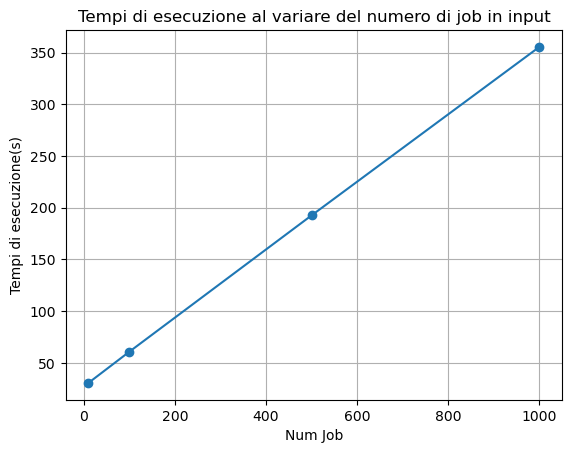

In [21]:
plt.plot(numero_job, tempi, marker='o')
plt.xlabel('Num Job')
plt.ylabel('Tempi di esecuzione(s)')
plt.title('Tempi di esecuzione al variare del numero di job in input')
plt.grid(True)
plt.show()

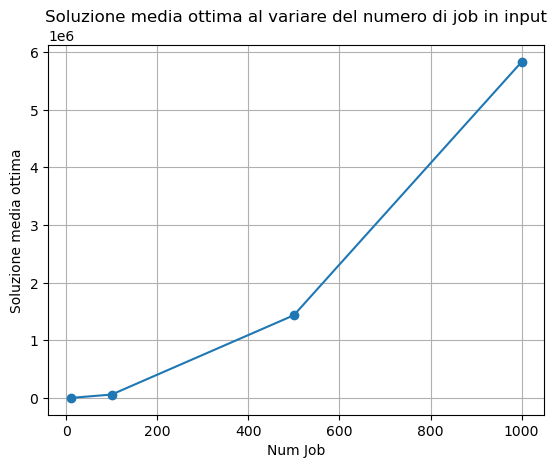

In [22]:
plt.plot(numero_job, soluzioni_finali, marker='o')
plt.xlabel('Num Job')
plt.ylabel('Soluzione media ottima')
plt.title('Soluzione media ottima al variare del numero di job in input')
plt.grid(True)
plt.show()

# ESPERIMENTI SULLE DUE FUNZIONI OBIETTIVO


In [25]:
def objective_functions(soluzione):
    somma_A = 0
    somma_B = 0
    somma_tot = 0
    for job in soluzione:
        string = str(job[0])
        somma_tot += job[1]
        if string.startswith('a'):
            somma_A += somma_tot
        else:
            somma_B += somma_tot
    
    print(str(somma_A) + " " + str(somma_B))
    return [somma_A + somma_B , abs(somma_A - somma_B)]

In [39]:
A = [('a{}'.format(i+1), random.randint(1, 10)) for i in range(50)]
lista_function1,lista_function2 = list(), list()
for j in range(1,10):
    if(j ==1):
        B = [('b{}'.format(i+1), random.randint(1, 10*j)) for i in range(50)]
    else:
        B = [('b{}'.format(i+1), random.randint(10, 10*j)) for i in range(50)]
    jobs = A + B
    best, best_eval = simulated_annealing(jobs, 1000, 0.5, 0.95)
    function1, function2 = objective_functions(best)
    print(function1)
    print(function2)
    lista_function1.append(function1)
    lista_function2.append(function2)

9320 9320
18640
0
21441 21440
42881
1
24210 24211
48421
1
30792 30793
61585
1
33529 33529
67058
0
40401 40409
80810
8
46821 46821
93642
0
42131 42131
84262
0
52138 52145
104283
7


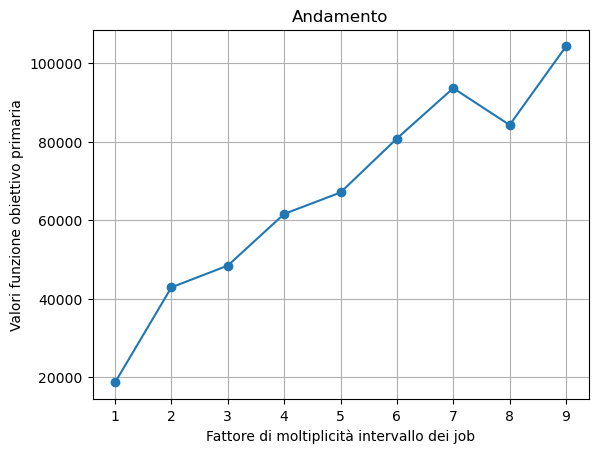

In [40]:
lista_iterazioni = [i for i in range(1, 10)]
# Plot function1
plt.plot(lista_iterazioni, lista_function1, marker='o')
plt.xlabel('Fattore di moltiplicità intervallo dei job')
plt.ylabel('Valori funzione obiettivo primaria')
plt.title('Andamento')
plt.grid(True)
plt.show()

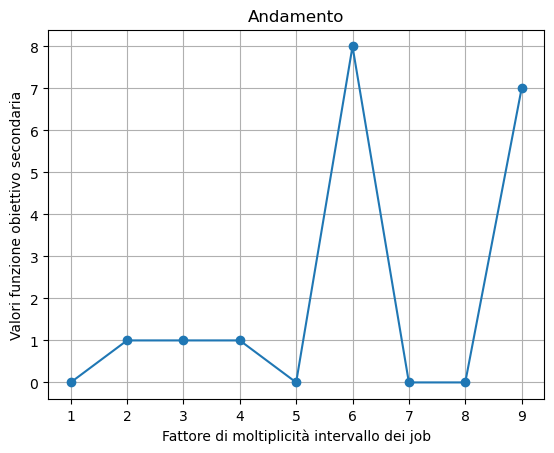

In [41]:
# Plot function2
plt.plot(lista_iterazioni, lista_function2, marker='o')
plt.xlabel('Fattore di moltiplicità intervallo dei job')
plt.ylabel('Valori funzione obiettivo secondaria')
plt.title('Andamento')
plt.grid(True)
plt.show()